# Library

In [10]:
import pandas as pd
import PreProcessingText as ppt
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Read csv

In [2]:
df = pd.read_csv('merged_data.csv')
print(df.shape)
df.head()

(292783, 12)


,name_board,creator_thread,creator_id_thread,name_thread,created_on,registration_date,total_posts,reputation,creator_post,creator_id_post,content,created_on_post
0,Tor,blonger,32544,"Tor shrinked of about 13,5% but you can contri...",2020-01-09,1900-01-01 00:00:00,0.0,0.0,[deleted],37,[removed],2019-10-16
1,Tor,blonger,32544,"Tor shrinked of about 13,5% but you can contri...",2020-01-09,1900-01-01 00:00:00,0.0,0.0,blonger,32544,The Torproject recently ***LINK***announced[ht...,2019-10-30
2,Tor,Xanitforthecash,2467,should I run a tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,rswz,32661,***LINK***http://ea5faa5po25cf7fb.onion/projec...,2019-10-16
3,Tor,Xanitforthecash,2467,should I run a tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,ChemistWeb,33150,if someone will do something bad from that ip ...,2019-10-16
4,Tor,Xanitforthecash,2467,should I run a tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,Xanitforthecash,2467,I already leave tor open for a good amount of ...,2019-10-16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292783 entries, 0 to 292782
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   name_board         292783 non-null  object 
 1   creator_thread     291854 non-null  object 
 2   creator_id_thread  292783 non-null  int64  
 3   name_thread        292783 non-null  object 
 4   created_on         292783 non-null  object 
 5   registration_date  283901 non-null  object 
 6   total_posts        283901 non-null  float64
 7   reputation         283901 non-null  float64
 8   creator_post       292783 non-null  object 
 9   creator_id_post    292783 non-null  int64  
 10  content            292783 non-null  object 
 11  created_on_post    292783 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 26.8+ MB


In [4]:
df.describe()

,creator_id_thread,total_posts,reputation,creator_id_post
count,292783.000000,283901.000000,283901.000000,292783.000000
mean,10955.409143,256.476825,110.806869,13859.933620
std,11966.111899,985.677180,520.127893,13231.876301
min,-1.000000,0.000000,-1313.000000,1.000000
25%,1759.000000,4.000000,0.000000,2370.000000
50%,6686.000000,25.000000,3.000000,9080.000000
75%,15491.000000,118.000000,23.000000,22793.000000
max,47346.000000,10406.000000,4790.000000,47532.000000


In [5]:
df.describe(include='object')

,name_board,creator_thread,name_thread,created_on,registration_date,creator_post,content,created_on_post
count,292783,291854,292783,292783,283901,292783,292783,292783
unique,382,23805,68931,25,577,42682,270239,629
top,DarkNetMarkets,[deleted],#FREE GIVE AWAY: 1000X XTC PILLS worth 950 EUR...,2020-01-08,1900-01-01 00:00:00,[deleted],[removed],2019-08-08
freq,49716,3919,342,101604,40879,4499,13198,26736


In [6]:
df.isnull().sum()

name_board              0
creator_thread        929
creator_id_thread       0
name_thread             0
created_on              0
registration_date    8882
total_posts          8882
reputation           8882
creator_post            0
creator_id_post         0
content                 0
created_on_post         0
dtype: int64

# Analyze name_thread

In [7]:
df['name_thread'].value_counts()

name_thread
#FREE GIVE AWAY: 1000X XTC PILLS worth 950 EURO GUESS NUMBER BITWEEN 1 AND 500                         342
Obtain Vendor Badge                                                                                    291
Giving away free 125g Gorilla Glue worth 725-1400 euros (IMPORTANT UPDATE!)                            270
COCAINE GIVE AWAY WE ARE GIVING AWAY 30G COLOMBIAN COCAINE COMMENT TO ENTER! ENDS 16/09/2019 1PM by    223
GIVEAWAY - 14G MORROCCAN HASHISH                                                                       222
                                                                                                      ... 
/d/ketamine is now live!                                                                                 1
Is there a way to view cancelled or refunded or orders after dispute?                                    1
AXS MARKET                                                                                               1
[ROLEX]Buy and get 50% mo

In [10]:
# 6 minutes
df['name_thread'] = df['name_thread'].apply(ppt.clean_sentences)
df['name_thread'] = df['name_thread'].apply(ppt.preprocess_title)

In [12]:
df['name_thread'].value_counts()

name_thread
free give away 1000x xtc pill worth 950 euro guess number bitween 500     342
obtain vendor badge                                                       297
giveaway 100g dark star worth 600                                         272
giving away free 125g gorilla glue worth 7251400 euro important update    270
                                                                          255
                                                                         ... 
herro happy holiday                                                         1
uk vendor order request                                                     1
determine whether site listed darkfail crosspost                            1
anybody experience drugsuks cocaine                                         1
1g signature 94 thc distillate cartridge cryptonia special                  1
Name: count, Length: 65976, dtype: int64

In [13]:
df.to_csv('cleaned_data_name_thread.csv', index=False)

## Plot Most-frequent Word

In [21]:
df = pd.read_csv('cleaned_data_name_thread.csv')
word_dict = Counter(' '.join([str(item) for item in df.name_thread.tolist()]).split())
df.head()

,name_board,creator_thread,creator_id_thread,name_thread,created_on,registration_date,total_posts,reputation,creator_post,creator_id_post,content,created_on_post
0,Tor,blonger,32544,tor shrinked 135 contribute,2020-01-09,1900-01-01 00:00:00,0.0,0.0,[deleted],37,[removed],2019-10-16
1,Tor,blonger,32544,tor shrinked 135 contribute,2020-01-09,1900-01-01 00:00:00,0.0,0.0,blonger,32544,The Torproject recently ***LINK***announced[ht...,2019-10-30
2,Tor,Xanitforthecash,2467,run tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,rswz,32661,***LINK***http://ea5faa5po25cf7fb.onion/projec...,2019-10-16
3,Tor,Xanitforthecash,2467,run tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,ChemistWeb,33150,if someone will do something bad from that ip ...,2019-10-16
4,Tor,Xanitforthecash,2467,run tor node,2020-01-09,2018-03-21 00:00:00,88.0,9.0,Xanitforthecash,2467,I already leave tor open for a good amount of ...,2019-10-16


In [26]:
# Convert numpy array to pandas DataFrame
df_unique = pd.DataFrame(df['name_thread'].unique())

# Save DataFrame to CSV
df_unique.to_csv('name_thread.txt', index=False, header=False)

### WordCloud

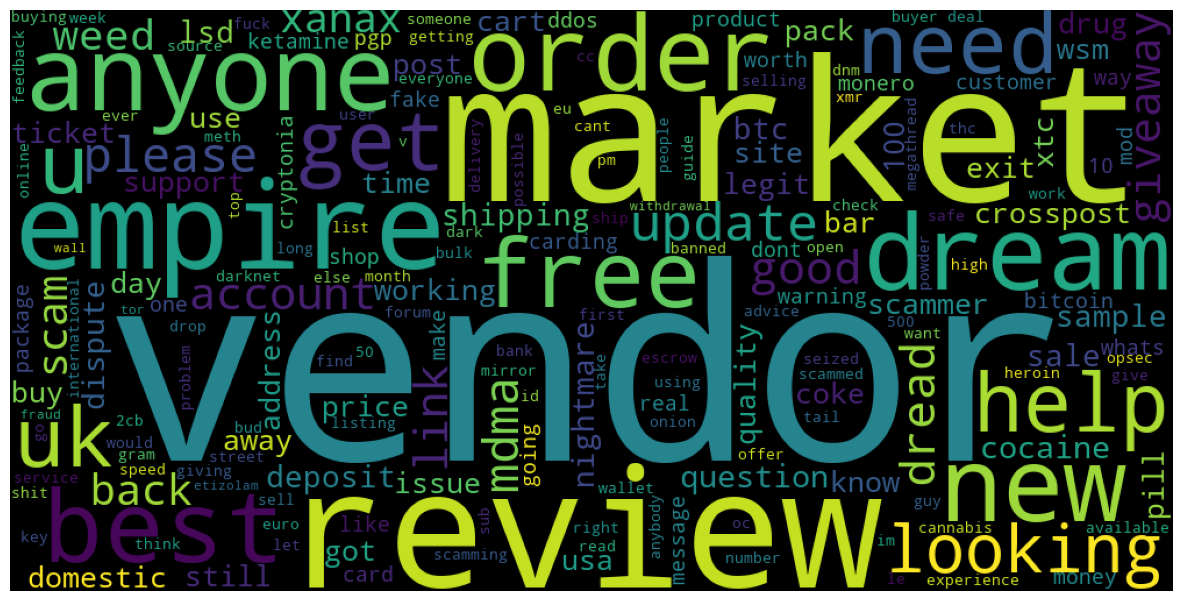

In [13]:
# Count of words in each name_thread
most_common_words = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_dict)
plt.figure(figsize=(15,8))
plt.imshow(most_common_words)
plt.axis("off");

### Barplot

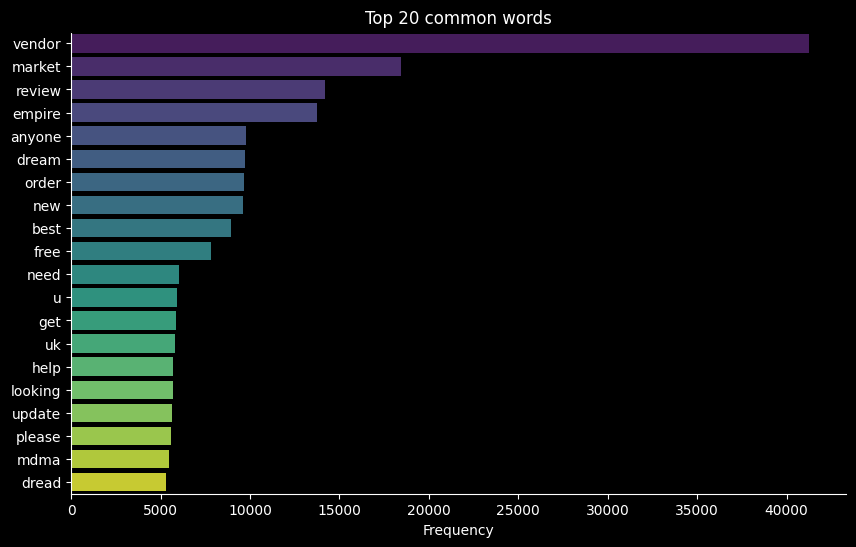

In [20]:
# Most 20 common words
word_freq = word_could_dict.most_common(20)
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6), facecolor='black', edgecolor='black')
sns.barplot(x='Frequency', y='Word', data=word_freq_df, hue='Word', dodge=False, palette='viridis', legend=False)
plt.title('Top 20 common words', color='white')
plt.xlabel('Frequency', color='white')
plt.ylabel('')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().set_facecolor('black');

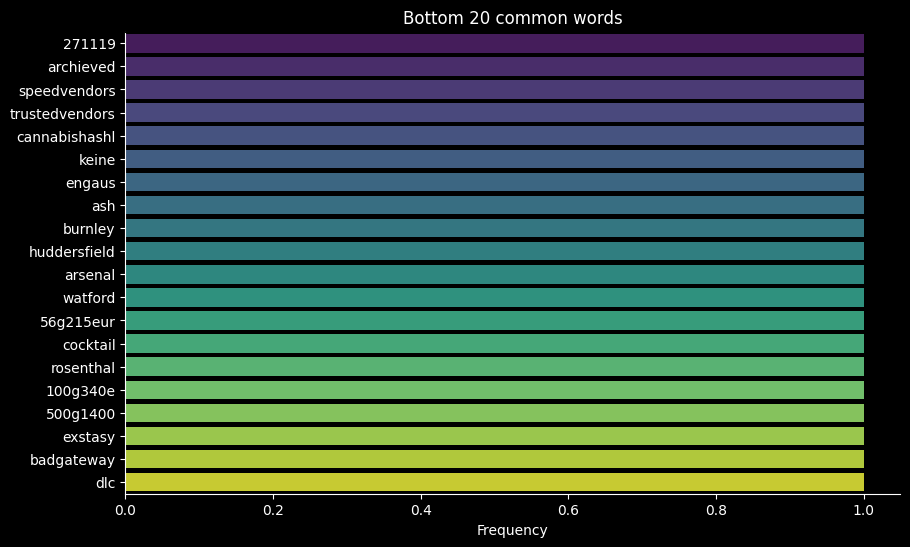

In [23]:
# Bottom 20 common words
word_freq = word_could_dict.most_common()[:-21:-1]
word_freq_df = pd.DataFrame(word_freq, columns=['Word', 'Frequency'])

plt.figure(figsize=(10, 6), facecolor='black', edgecolor='black')
sns.barplot(x='Frequency', y='Word', data=word_freq_df, hue='Word', dodge=False, palette='viridis', legend=False)
plt.title('Bottom 20 common words', color='white')
plt.xlabel('Frequency', color='white')
plt.ylabel('')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['left'].set_color('white')
plt.gca().set_facecolor('black');